In [44]:
import numpy as np
import contourpy

In [55]:
from qpmr.qpmr_v3 import qpmr as qpmr_v3
from qpmr.quasipoly import examples
from qpmr.quasipoly import compress
import qpmr.plot

In [15]:
coefs, delays = examples.vyhlidal2014qpmr_02()
coefs = coefs/ 0.2

In [16]:
coefs, delays = compress(coefs, delays)

In [ ]:
# TODO assert compressed, sorted and first delay is zero
# TODO normalize by coefs[0,-1], assert that this is not zero (that would be advanced system)
alphas = []
for k, tau in enumerate(delays):
    if k == 0:
        alpha0 = np.max(np.abs(np.roots(coefs[0,:-1][::-1])))
        alphas.append(alpha0)
    else:
        alphak = np.linalg.norm(coefs[k,:-1], ord=2)
        alphas.append(alphak)


In [ ]:
def f(z):
    return - np.abs(z)

[2.7473669012386677,
 145.5,
 34.31471987354698,
 106.37081366615563,
 36.89512162874653,
 126.0865278291063,
 2.5,
 7.520804478245662,
 258.5]

In [30]:
real_range = np.arange(-20, 50, 0.1)
imag_range = np.arange(-100, 100, 0.1)
complex_grid = 1j*imag_range.reshape(-1, 1) + real_range

In [41]:
r = np.sum(np.exp(-np.real(complex_grid)[:,:,None]*delays[None,:])*alphas, axis=-1) - np.abs(complex_grid)

In [45]:
contour_generator = contourpy.contour_generator(x=real_range, y=imag_range, z=r)
zero_level_contours = contour_generator.lines(0.0) # find all 0-level real contours

In [51]:
envelope = zero_level_contours[0]

In [68]:
roots, meta = qpmr_v3((-10, 5, 0, 100), coefs, delays)

<Axes: xlabel='$\\Re (\\lambda)$', ylabel='$\\Im (\\lambda)$'>

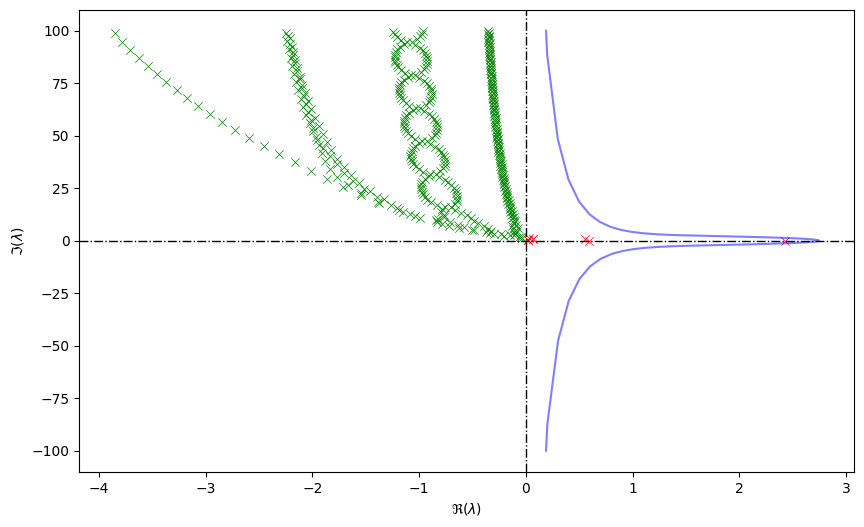

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(envelope[:,0], envelope[:,1], color="b", alpha=0.5)
qpmr.plot.roots(roots, ax=ax)


In [70]:
delays, alphas

(array([ 0.  ,  4.61,  8.52, 10.33, 13.32, 18.52, 19.9 , 23.35, 24.99]),
 [2.7473669012386677,
  145.5,
  34.31471987354698,
  106.37081366615563,
  36.89512162874653,
  126.0865278291063,
  2.5,
  7.520804478245662,
  258.5])

(1.5707963267948966, 1.7600116730752344)

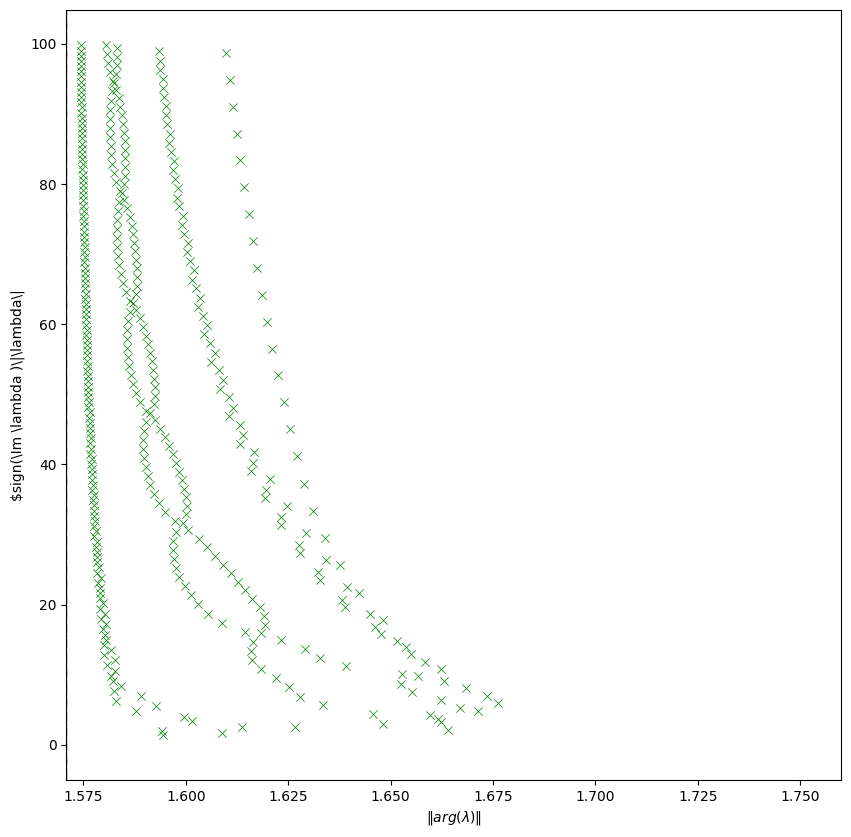

In [74]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
qpmr.plot.experimental(roots, ax=ax)
ax.set_xlim((np.pi/2, None))